# An EDA on Glassdoor Company Insights: Scraped Data Collection

## 1. import the necessary library 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. read the data to be used 

In [2]:
df = pd.read_csv("Glassdoor.csv", encoding='ISO-8859-1')

In [3]:
df.head()

,Company Name,Company rating,Company reviews,Company salaries,Company Jobs,Location,Number of Employees,Industry Type,Company Description
0,Amazon,3.8,168.8K,201.7K,201.7K,25 office locations in United States,10000+ Employees,Internet & Web Services,"All Amazon teams and businesses, from Prime de..."
1,Deloitte,4.1,97.2K,167.4K,167.4K,23 office locations in United States,10000+ Employees,Accounting & Tax,Think a professional services career is nothin...
2,Target,3.6,75K,116.1K,116.1K,4 office locations in United States,10000+ Employees,General Merchandise & Superstores,Target is one of the worlds most recognized b...
3,McDonald's,3.5,117K,71.7K,71.7K,110 N Carpenter Street,10000+ Employees,Restaurants & Cafes,McDonalds is proud to be one of the most reco...
4,Accenture,4.0,145.1K,53.6K,53.6K,United States,10000+ Employees,Business Consulting,Accenture is a global professional services co...


## 3. Description of the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9940 entries, 0 to 9939
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company Name         9939 non-null   object 
 1   Company rating       9940 non-null   float64
 2   Company reviews      9940 non-null   object 
 3   Company salaries     9940 non-null   object 
 4   Company Jobs         9940 non-null   object 
 5   Location             9940 non-null   object 
 6   Number of Employees  9940 non-null   object 
 7   Industry Type        9760 non-null   object 
 8   Company Description  9906 non-null   object 
dtypes: float64(1), object(8)
memory usage: 699.0+ KB


In [5]:
df.shape

(9940, 9)

In [6]:
df.nunique()

Company Name           9876
Company rating           16
Company reviews        1156
Company salaries       1167
Company Jobs           1167
Location                815
Number of Employees       8
Industry Type           118
Company Description    8664
dtype: int64

In [7]:
df.isna().sum()

Company Name             1
Company rating           0
Company reviews          0
Company salaries         0
Company Jobs             0
Location                 0
Number of Employees      0
Industry Type          180
Company Description     34
dtype: int64

In [8]:
df.drop_duplicates()

,Company Name,Company rating,Company reviews,Company salaries,Company Jobs,Location,Number of Employees,Industry Type,Company Description
0,Amazon,3.8,168.8K,201.7K,201.7K,25 office locations in United States,10000+ Employees,Internet & Web Services,"All Amazon teams and businesses, from Prime de..."
1,Deloitte,4.1,97.2K,167.4K,167.4K,23 office locations in United States,10000+ Employees,Accounting & Tax,Think a professional services career is nothin...
2,Target,3.6,75K,116.1K,116.1K,4 office locations in United States,10000+ Employees,General Merchandise & Superstores,Target is one of the worlds most recognized b...
3,McDonald's,3.5,117K,71.7K,71.7K,110 N Carpenter Street,10000+ Employees,Restaurants & Cafes,McDonalds is proud to be one of the most reco...
4,Accenture,4.0,145.1K,53.6K,53.6K,United States,10000+ Employees,Business Consulting,Accenture is a global professional services co...
...,...,...,...,...,...,...,...,...,...
9935,Furman University,4.0,169,229,229,United States,501 to 1000 Employees,Colleges & Universities,"This school's slogan could be, ""Go Further tha..."
9936,Kilwin's Chocolates,3.8,186,192,192,United States,51 to 200 Employees,Food & Beverage Manufacturing,TOA Global is the market leader in dedicated o...
9937,TOA Global,4.3,618,21,21,United States,1001 to 5000 Employees,HR Consulting,Insurance broking and risk management solution...
9938,JLT Group,3.7,543,51,51,United States,5001 to 10000 Employees,Insurance Agencies & Brokerages,A steakhouse experience should be unforgettabl...


In [9]:
df.shape

(9940, 9)

### Summary of the description

The data has columns and 9940 entries or rows.


The data has only one categorical column which is the number of employees and an ordinal column which is rating 


The data has very few null value which will later be replace with "unknown"

Also observed that the data in the columns Company jobs does not fit the description given.
So it will be dropped

### 3.1 checking the unique values of company rating and number of employees

In [10]:
df["Company rating"].unique()


array([3.8, 4.1, 3.6, 3.5, 4. , 4.4, 3.9, 3.7, 4.2, 4.3, 4.6, 4.5, 4.7,
       4.8, 4.9, 5. ])

In [11]:
df["Number of Employees"].unique()

array(['10000+ Employees', '1001 to 5000 Employees',
       '5001 to 10000 Employees', 'Unknown', '501 to 1000 Employees',
       '51 to 200 Employees', '201 to 500 Employees', '1 to 50 Employees'],
      dtype=object)

## 4. Data Cleaning

In [12]:
# droping the company job column
df.drop("Company Jobs", axis = 1, inplace= True)

### The company review and company salaries is an object form. It needs to be converted float or integer

In [13]:
x= ["Company reviews", "Company salaries"]
for i in x:
    df[i] = df[i].apply(lambda x : x.strip('K').replace(',','')).astype(float)*1000

In [14]:
df[df["Company Name"].isna()]

,Company Name,Company rating,Company reviews,Company salaries,Location,Number of Employees,Industry Type,Company Description
3299,NaN,4.1,249000.0,969000.0,United States,10000+ Employees,NaN,None


### Replacing the null value with "UNKNOWN"

In [15]:
df.fillna("Unknown", inplace= True)

In [16]:
df.fillna("Unknown", inplace= True)

## 5. Exploratory Data Analysis 

### 5.1 Frequency distribution on Company rating and Number of employees

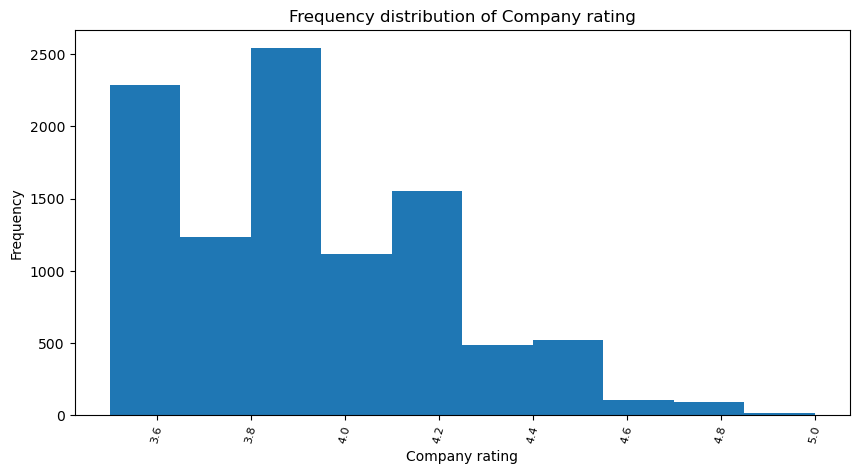

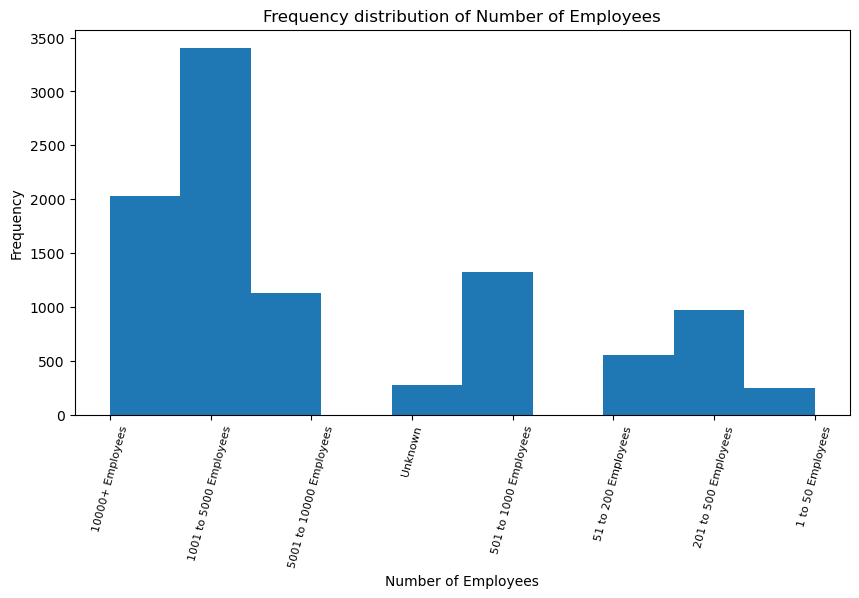

In [17]:
y = ["Company rating", "Number of Employees"]
for i in y:
    plt.figure(figsize=(10,5))
    plt.hist(df[i], bins =10)
    plt.title("Frequency distribution of "+i)
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.xticks(rotation = 75, fontsize = 8)
    plt.show()

### 5.2 Top ten companies with highest company reviews

In [18]:
df2 = df.sort_values("Company reviews", ascending= False).head(10)
df2


,Company Name,Company rating,Company reviews,Company salaries,Location,Number of Employees,Industry Type,Company Description
1738,Pentair,3.9,998000.0,1100.0,29 office locations in United States,5001 to 10000 Employees,Machinery Manufacturing,"At Pentair, our work is driven by our belief t..."
2946,Landis+Gyr,4.0,998000.0,471000.0,6 office locations in United States,5001 to 10000 Employees,Electronics Manufacturing,Landis+Gyr is the leading global provider of i...
1236,Moss Adams LLP,4.0,996000.0,2200.0,31 office locations in United States,1001 to 5000 Employees,Accounting & Tax,Moss Adams is a fully integrated professional ...
2364,DDB,3.6,994000.0,719000.0,2 office locations in United States,10000+ Employees,Advertising & Public Relations,USAID leads international development and huma...
1566,freelance,4.3,994000.0,1500.0,United States,Unknown,Unknown,Harmony Public Schools is a network of PK-12 c...
2220,Kelly Educational Staffing,3.7,993000.0,944000.0,United States,5001 to 10000 Employees,HR Consulting,Aerojet Rocketdyne is an aerospace and defense...
1910,Conga,3.8,993000.0,869000.0,3 office locations in United States,1001 to 5000 Employees,Enterprise Software & Network Solutions,Conga crushes complexity within an increasingl...
1436,SEI Investments,4.0,993000.0,1800.0,9 office locations in United States,1001 to 5000 Employees,Investment & Asset Management,SEI Investments provides outsourced investment...
1787,Embassy Suites,3.7,992000.0,1400.0,25 office locations in United States,1001 to 5000 Employees,Hotels & Resorts,Dematic is an intralogistics innovator that de...
6824,HCL Technologies,3.7,992000.0,75000.0,United States,Unknown,Unknown,Earnest was founded in 2013 on the belief that...


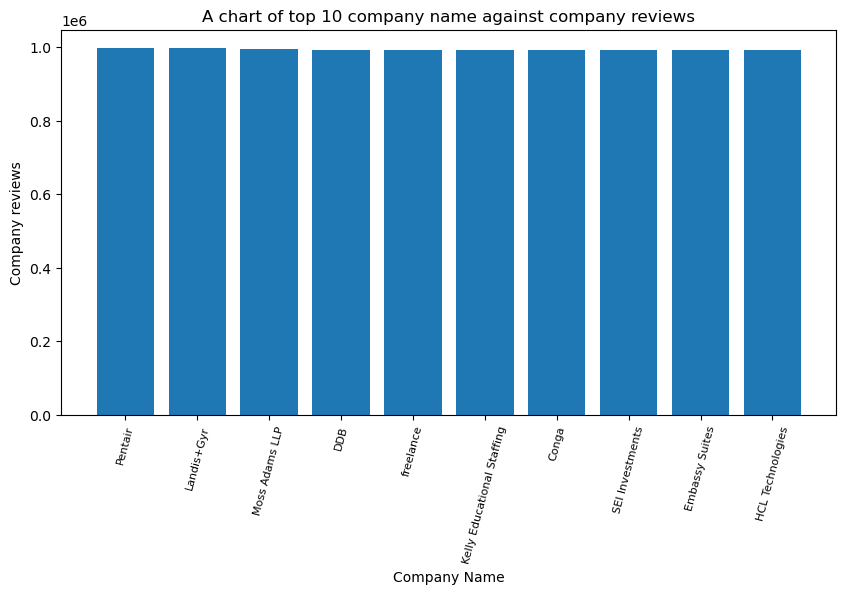

In [19]:
plt.figure(figsize=(10,5))
plt.bar(df2["Company Name"], df2["Company reviews"])
plt.title("A chart of top 10 company name against company reviews")
plt.xlabel("Company Name")
plt.ylabel('Company reviews')
plt.xticks(rotation = 75, fontsize = 8)
plt.show()

### 5.3 Top ten companies with lowest company reviews

In [20]:
df3 = df.sort_values("Company reviews", ascending= False).tail(10)
df3

,Company Name,Company rating,Company reviews,Company salaries,Location,Number of Employees,Industry Type,Company Description
1579,Texas Children's Hospital,4.0,1000.0,1700.0,9 office locations in United States,10000+ Employees,Health Care Services & Hospitals,Known worldwide for expertise in pediatric and...
1479,Freeport-McMoRan,4.1,1000.0,1700.0,21 office locations in United States,10000+ Employees,Mining & Metals,Freeport-McMoRan (FCX) is a leading internatio...
1550,Volt Information Sciences,3.6,1000.0,1700.0,32 office locations in United States,10000+ Employees,HR Consulting,"Volt is a global provider of talent, technolog..."
1537,University of New Mexico,3.8,1000.0,1800.0,4 office locations in United States,10000+ Employees,Colleges & Universities,Kimpton Hotels & Restaurants is the original b...
1531,Choice Hotels,3.9,1000.0,1400.0,2 office locations in United States,1001 to 5000 Employees,Hotels & Resorts,"Choice Hotels International, Inc. (NYSE: CHH) ..."
3673,Celestica,3.9,1000.0,250000.0,8 office locations in United States,10000+ Employees,Electronics Manufacturing,Celestica enables the world's best brands. Thr...
1519,Lehigh Valley Hospital and Health Network,3.6,1000.0,1800.0,11 office locations in United States,10000+ Employees,Health Care Services & Hospitals,None
1514,DTE Energy,4.0,1000.0,1800.0,20 office locations in United States,10000+ Employees,Energy & Utilities,ZoomInfo suite of modern go-to-market software...
1484,Paycor,3.6,1000.0,1500.0,38 office locations in United States,1001 to 5000 Employees,Enterprise Software & Network Solutions,Paycor creates Human Capital Management (HCM) ...
1686,Sunbelt Rentals,3.8,1000.0,1400.0,25 office locations in United States,10000+ Employees,Commercial Equipment Services,We Make it Happen! With a passionate team of 1...


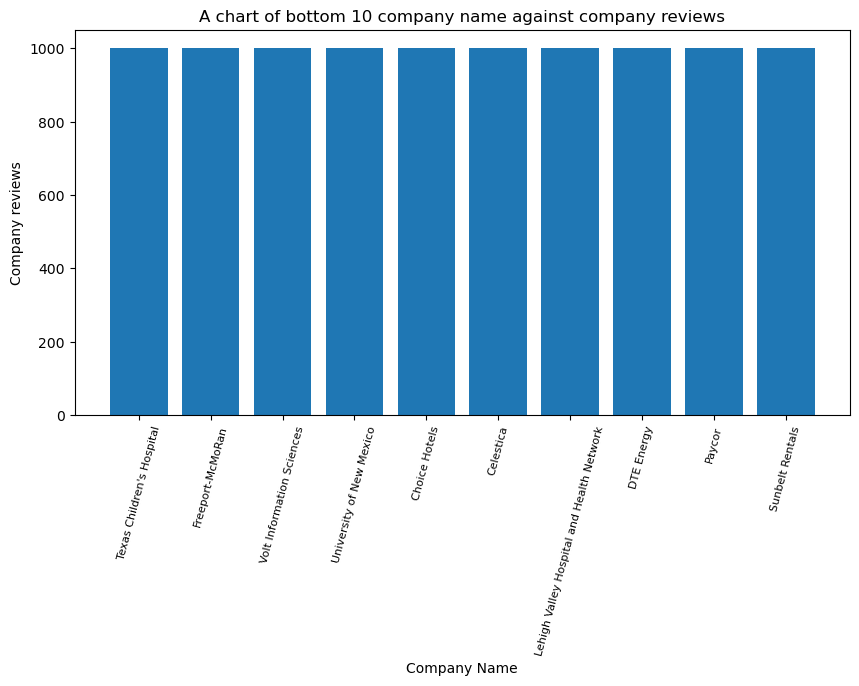

In [21]:
plt.figure(figsize=(10,5))
plt.bar(df3["Company Name"], df3["Company reviews"])
plt.title("A chart of bottom 10 company name against company reviews")
plt.xlabel("Company Name")
plt.ylabel('Company reviews')
plt.xticks(rotation = 75, fontsize = 8)
plt.show()

### 5.4 Top ten companies with highest company salary

In [22]:
df4 =df.sort_values("Company salaries", ascending= False).head(10)
df4

,Company Name,Company rating,Company reviews,Company salaries,Location,Number of Employees,Industry Type,Company Description
3016,Waymo,3.8,296000.0,999000.0,6 office locations in United States,Unknown,Computer Hardware Development,Waymo is an autonomous driving technology comp...
2332,Pandora,4.0,514000.0,999000.0,3 office locations in United States,1001 to 5000 Employees,Broadcast Media,"SiriusXM and its brands (Pandora, Stitcher, SX..."
2624,University of San Francisco,4.3,716000.0,998000.0,United States,1001 to 5000 Employees,Colleges & Universities,Jesuits are known for their devotion to educat...
1818,Waters,4.0,985000.0,998000.0,6 office locations in United States,5001 to 10000 Employees,Biotech & Pharmaceuticals,"You might say ""The Beeb"" puts Britain on the a..."
2121,BI-LO,4.0,876000.0,997000.0,United States,10000+ Employees,Grocery Stores,LKQ Corporation is a leading provider of alter...
2210,Pariveda,4.8,551000.0,997000.0,11 office locations in United States,501 to 1000 Employees,Business Consulting,Pariveda is a consulting firm dedicated to sol...
3570,US Government Agency,4.1,316000.0,997000.0,United States,Unknown,Unknown,Speridians (www.speridian.com) comprehensive ...
1834,The Zappos Family,3.7,635000.0,997000.0,United States,1001 to 5000 Employees,"Department, Clothing & Shoe Stores","The Zappos Family of Companies, a subsidiary o..."
2129,DaVita Medical Group,3.7,675000.0,996000.0,26 office locations in United States,10000+ Employees,Health Care Services & Hospitals,None
2636,County of San Diego,3.6,580000.0,996000.0,3 office locations in United States,10000+ Employees,Municipal Agencies,"At Danone North America, youll work with some..."


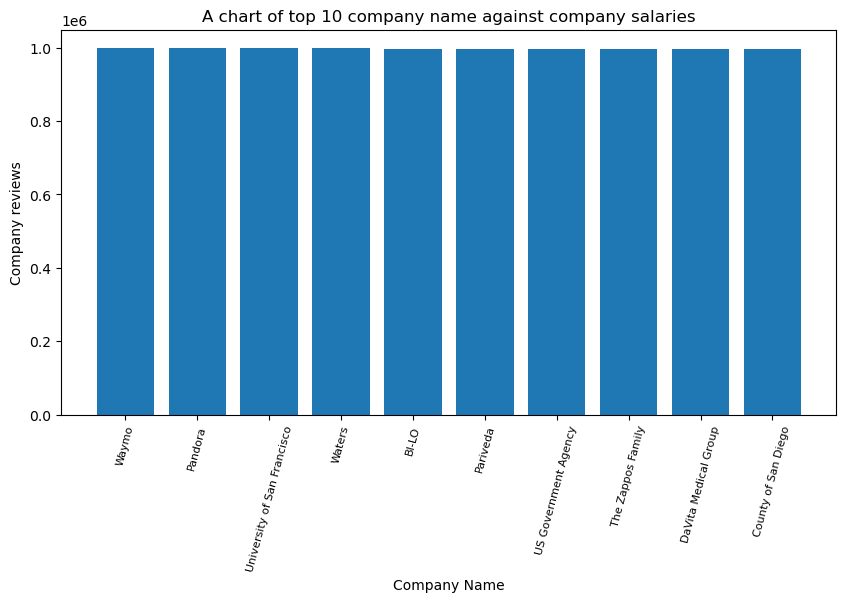

In [23]:
plt.figure(figsize=(10,5))
plt.bar(df4["Company Name"], df4["Company salaries"])
plt.title("A chart of top 10 company name against company salaries")
plt.xlabel("Company Name")
plt.ylabel('Company reviews')
plt.xticks(rotation = 75, fontsize = 8)
plt.show()

### 5.5 Top ten companies with lowest company reviews

In [24]:
df5 = df.sort_values("Company salaries", ascending= False).tail(10)
df5

,Company Name,Company rating,Company reviews,Company salaries,Location,Number of Employees,Industry Type,Company Description
1612,Ultimate Medical Academy,4.2,1200.0,1000.0,5 office locations in United States,1001 to 5000 Employees,Education & Training Services,Ultimate Medical Academy has a variety of care...
1933,Enlivant,3.8,865000.0,1000.0,25 office locations in United States,1001 to 5000 Employees,Health Care Services & Hospitals,"Since 1981, Enlivant has delivered a pioneerin..."
2475,DHG,4.2,557000.0,1000.0,37 office locations in United States,1001 to 5000 Employees,Accounting & Tax,DHG ranks among the top 20 public accounting f...
1943,Westin,3.9,1100.0,1000.0,3 office locations in United States,5001 to 10000 Employees,Hotels & Resorts,Westin Hotels & Resorts is an American upscale...
1946,Olympus Corporation of the Americas,3.6,868000.0,1000.0,10 office locations in United States,5001 to 10000 Employees,Health Care Products Manufacturing,"For more than 100 years at Olympus, Our Purpos..."
1598,FICO,4.1,1400.0,1000.0,13 office locations in United States,1001 to 5000 Employees,Computer Hardware Development,None
2443,Associated Bank,3.7,619000.0,1000.0,25 office locations in United States,1001 to 5000 Employees,Banking & Lending,Associated Bank is the largest Wisconsin-based...
2430,Saia LTL Freight,3.5,663000.0,1000.0,27 office locations in United States,5001 to 10000 Employees,Shipping & Trucking,"Saia, Inc. (NASDAQ: SAIA) offers customers a w..."
1977,Proofpoint,4.1,790000.0,1000.0,8 office locations in United States,1001 to 5000 Employees,Enterprise Software & Network Solutions,What we are: a provider of multiple truckload ...
1772,Vonage,4.1,1100.0,1000.0,12 office locations in United States,1001 to 5000 Employees,Enterprise Software & Network Solutions,Vonage (NYSE: VG) is a software technology com...


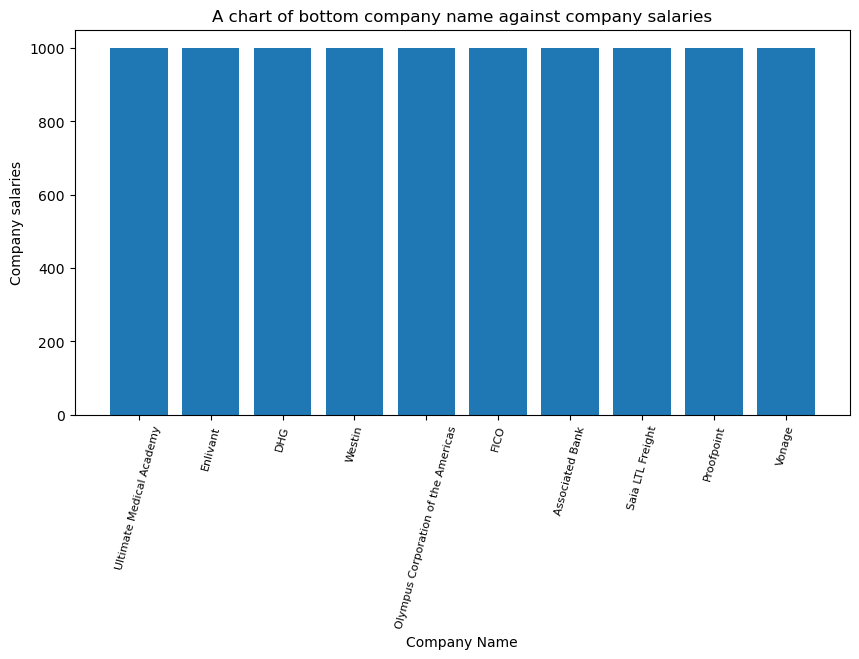

In [25]:
plt.figure(figsize=(10,5))
plt.bar(df5["Company Name"], df5["Company salaries"])
plt.title("A chart of bottom company name against company salaries")
plt.xlabel("Company Name")
plt.ylabel('Company salaries')
plt.xticks(rotation = 75, fontsize = 8)
plt.show()

### 5.6. A correlation chart of company salaries and company reviews

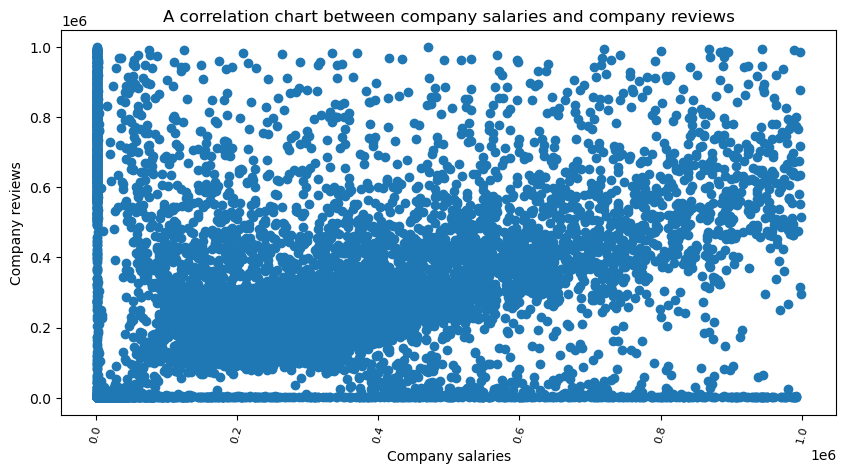

In [26]:
plt.figure(figsize=(10,5))
plt.scatter(df["Company salaries"], df["Company reviews"])
plt.title("A correlation chart between company salaries and company reviews")
plt.xlabel("Company salaries")
plt.ylabel('Company reviews')
plt.xticks(rotation = 75, fontsize = 8)
plt.show()

### 5.7.  Top ten industries with highest average company salaries

In [27]:
df6 = df.groupby("Industry Type").mean().sort_values("Company salaries", ascending= False).head(10).reset_index()
df6

C:\Users\HP\AppData\Local\Temp\ipykernel_6444\3091958520.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df6 = df.groupby("Industry Type").mean().sort_values("Company salaries", ascending= False).head(10).reset_index()


,Industry Type,Company rating,Company reviews,Company salaries
0,Parking & Valet,3.675,479750.000000,592250.000000
1,Pet Care & Veterinary,3.800,404333.333333,542666.666667
2,Consumer Product Rental,3.940,336630.000000,517800.000000
3,Real Estate Agencies,4.400,404000.000000,487000.000000
4,Medical Testing & Clinical Laboratories,4.050,170500.000000,469500.000000
5,Wood & Paper Manufacturing,3.600,376428.571429,469285.714286
6,Private Households,4.300,248000.000000,464000.000000
7,Debt Relief,3.800,645750.000000,448000.000000
8,Media & Entertainment Stores,3.740,342880.000000,420400.000000
9,Dental Clinics,3.900,341000.000000,404000.000000


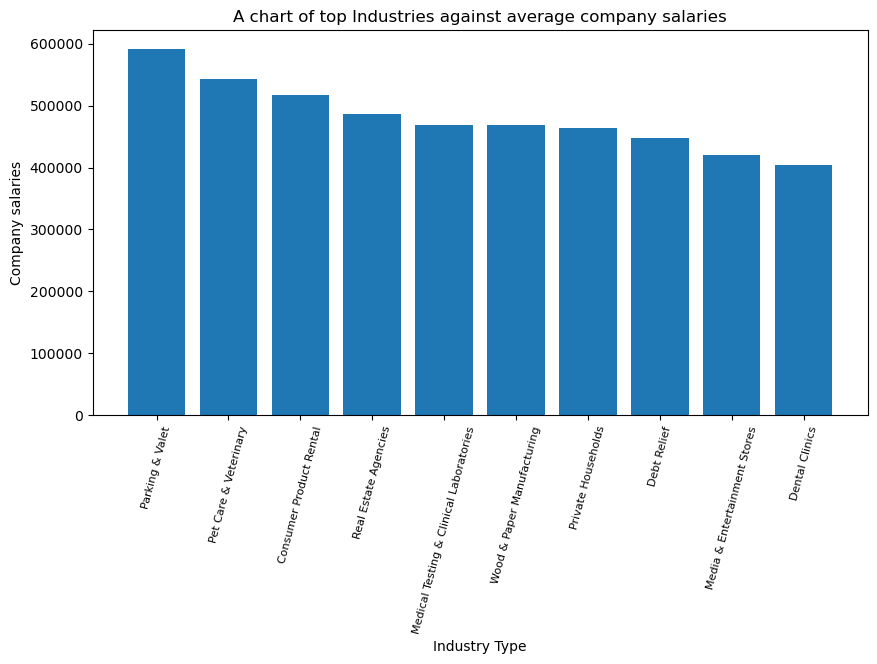

In [28]:
plt.figure(figsize=(10,5))
plt.bar(df6["Industry Type"], df6["Company salaries"])
plt.title("A chart of top Industries against average company salaries")
plt.xlabel("Industry Type")
plt.ylabel('Company salaries')
plt.xticks(rotation = 75, fontsize = 8)
plt.show()

### 5.8.  Top ten industries with lowest average company salaries

In [29]:
df7 = df.groupby("Industry Type").mean().sort_values("Company salaries", ascending= False).tail(10).reset_index()
df7

C:\Users\HP\AppData\Local\Temp\ipykernel_6444\640890621.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df7 = df.groupby("Industry Type").mean().sort_values("Company salaries", ascending= False).tail(10).reset_index()


,Industry Type,Company rating,Company reviews,Company salaries
0,Drug & Health Stores,3.662500,139025.000000,188525.000000
1,General Merchandise & Superstores,3.762500,184325.000000,184481.250000
2,Home Furniture & Housewares Stores,3.763415,163843.902439,181570.731707
3,Waste Management,3.740000,284400.000000,172020.000000
4,Textile & Apparel Manufacturing,3.800000,201000.000000,169000.000000
5,Event Services,3.700000,499833.333333,157200.000000
6,Car & Truck Rental,3.800000,129820.000000,111460.000000
7,Pharmaceutical,3.750000,621000.000000,72000.000000
8,Laundry & Dry Cleaning,3.800000,2000.000000,2300.000000
9,Ticket Sales,4.000000,1100.000000,1000.000000


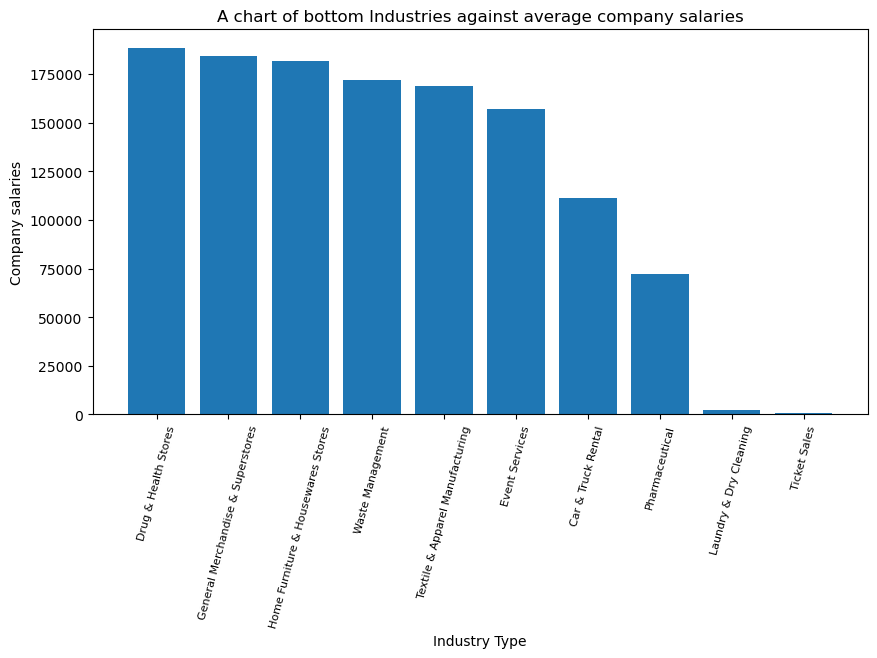

In [30]:
plt.figure(figsize=(10,5))
plt.bar(df7["Industry Type"], df7["Company salaries"])
plt.title("A chart of bottom Industries against average company salaries")
plt.xlabel("Industry Type")
plt.ylabel('Company salaries')
plt.xticks(rotation = 75, fontsize = 8)
plt.show()

### 5.9.  Top ten industries with highest average company reviews

In [31]:
df9 = df.groupby("Industry Type").mean().sort_values("Company reviews", ascending= False).head(10).reset_index()
df9

C:\Users\HP\AppData\Local\Temp\ipykernel_6444\3201843773.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df9 = df.groupby("Industry Type").mean().sort_values("Company reviews", ascending= False).head(10).reset_index()


,Industry Type,Company rating,Company reviews,Company salaries
0,Translation & Linguistic Services,3.700000,871000.000000,284000.000000
1,Debt Relief,3.800000,645750.000000,448000.000000
2,Pharmaceutical,3.750000,621000.000000,72000.000000
3,Event Services,3.700000,499833.333333,157200.000000
4,Parking & Valet,3.675000,479750.000000,592250.000000
5,Farm Support,4.025000,463025.000000,383512.500000
6,Religious Institutions,4.114286,455657.142857,338900.000000
7,Pet Care & Veterinary,3.800000,404333.333333,542666.666667
8,Real Estate Agencies,4.400000,404000.000000,487000.000000
9,Vehicle Repair & Maintenance,3.685714,401714.285714,339471.428571


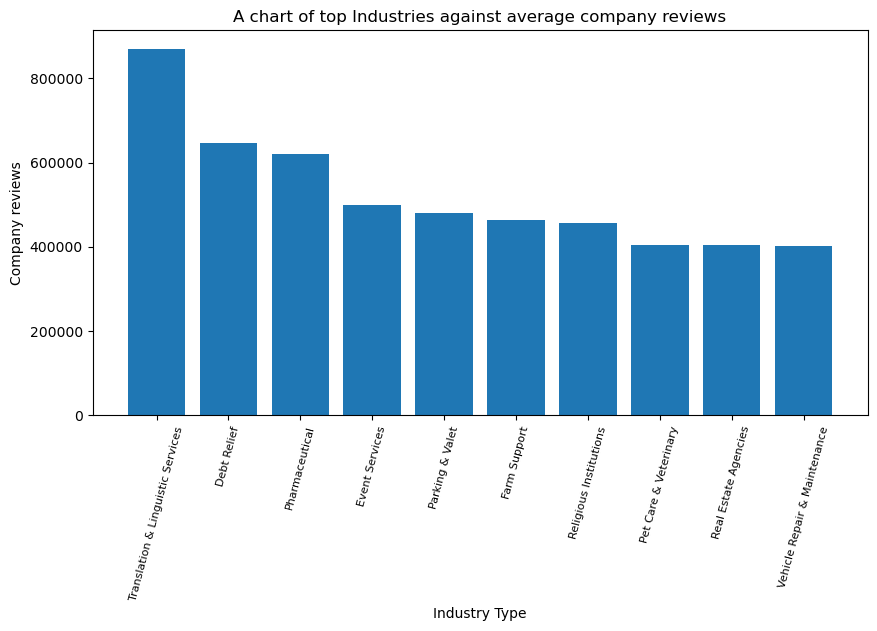

In [32]:
plt.figure(figsize=(10,5))
plt.bar(df9["Industry Type"], df9["Company reviews"])
plt.title("A chart of top Industries against average company reviews")
plt.xlabel("Industry Type")
plt.ylabel('Company reviews')
plt.xticks(rotation = 75, fontsize = 8)
plt.show()

### 5.10.  Top ten industries with lowest average company reviews

In [33]:
df10 = df.groupby("Industry Type").mean().sort_values("Company reviews", ascending= False).tail(10).reset_index()
df10

C:\Users\HP\AppData\Local\Temp\ipykernel_6444\2617750932.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df10 = df.groupby("Industry Type").mean().sort_values("Company reviews", ascending= False).tail(10).reset_index()


,Industry Type,Company rating,Company reviews,Company salaries
0,Nursing Care Facilities,3.800000,141133.333333,277000.000000
1,Drug & Health Stores,3.662500,139025.000000,188525.000000
2,Office Supply & Copy Stores,3.600000,138320.000000,279280.000000
3,Animal Production,4.000000,136000.000000,305000.000000
4,Car & Truck Rental,3.800000,129820.000000,111460.000000
5,Crop Production,3.890909,100236.363636,246636.363636
6,Marine Transportation,3.900000,73066.666667,369400.000000
7,Biotechnology,3.900000,63575.000000,247950.000000
8,Laundry & Dry Cleaning,3.800000,2000.000000,2300.000000
9,Ticket Sales,4.000000,1100.000000,1000.000000


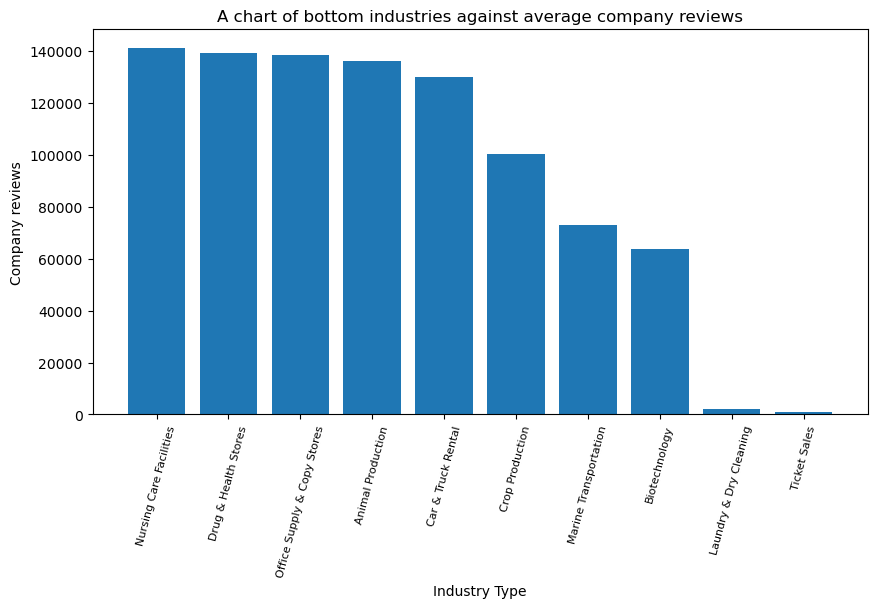

In [34]:
plt.figure(figsize=(10,5))
plt.bar(df10["Industry Type"], df10["Company reviews"])
plt.title("A chart of bottom industries against average company reviews")
plt.xlabel("Industry Type")
plt.ylabel('Company reviews')
plt.xticks(rotation = 75, fontsize = 8)
plt.show()

### 5.11.  Top ten industries with highest average company ratings

In [35]:
df11 = df.groupby("Industry Type").mean().sort_values("Company rating", ascending= False).head(10).reset_index()
df11

C:\Users\HP\AppData\Local\Temp\ipykernel_6444\1308504777.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df11 = df.groupby("Industry Type").mean().sort_values("Company rating", ascending= False).head(10).reset_index()


,Industry Type,Company rating,Company reviews,Company salaries
0,Real Estate Agencies,4.400000,404000.000000,487000.000000
1,Private Households,4.300000,248000.000000,464000.000000
2,Religious Institutions,4.114286,455657.142857,338900.000000
3,Stock Exchanges,4.063636,245000.000000,205090.909091
4,Medical Testing & Clinical Laboratories,4.050000,170500.000000,469500.000000
5,Colleges & Universities,4.049672,269674.590164,264505.245902
6,Mining & Metals,4.036842,291373.684211,279615.789474
7,Staffing & Subcontracting,4.031250,237606.250000,313683.333333
8,Software Development,4.030172,294575.000000,282487.068966
9,Farm Support,4.025000,463025.000000,383512.500000


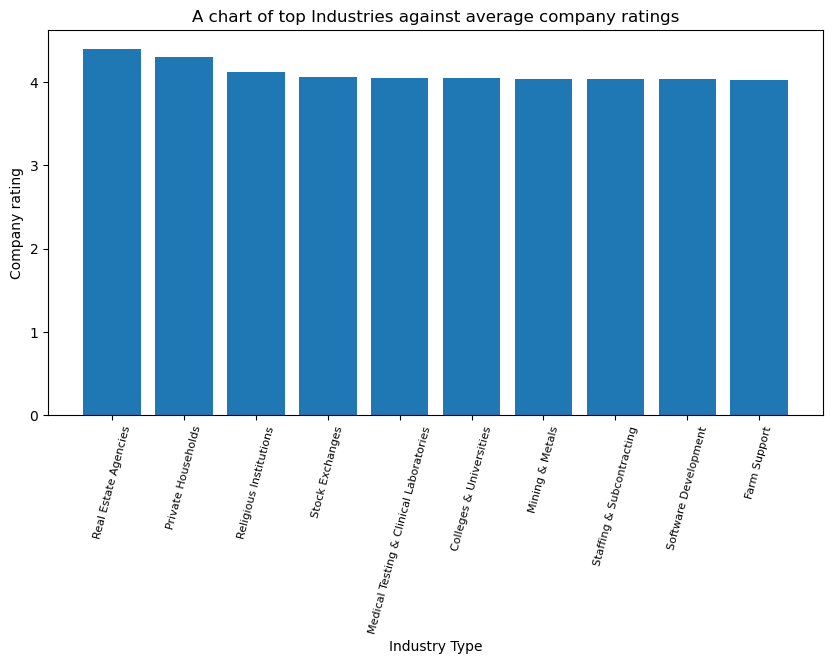

In [36]:
plt.figure(figsize=(10,5))
plt.bar(df11["Industry Type"], df11["Company rating"])
plt.title("A chart of top Industries against average company ratings")
plt.xlabel("Industry Type")
plt.ylabel('Company rating')
plt.xticks(rotation = 75, fontsize = 8)
plt.show()

### 5.12.  Top ten industries with lowest average company ratings

In [37]:
df12 = df.groupby("Industry Type").mean().sort_values("Company rating", ascending= False).tail(10).reset_index()
df12

C:\Users\HP\AppData\Local\Temp\ipykernel_6444\1071295050.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df12 = df.groupby("Industry Type").mean().sort_values("Company rating", ascending= False).tail(10).reset_index()


,Industry Type,Company rating,Company reviews,Company salaries
0,Grocery Stores,3.689130,246913.043478,249350.000000
1,State & Regional Agencies,3.687179,305102.564103,397676.923077
2,Vehicle Repair & Maintenance,3.685714,401714.285714,339471.428571
3,Pet & Pet Supplies Stores,3.675000,310925.000000,281850.000000
4,Parking & Valet,3.675000,479750.000000,592250.000000
5,Drug & Health Stores,3.662500,139025.000000,188525.000000
6,Property Management,3.600000,168000.000000,293000.000000
7,Audiovisual,3.600000,242000.000000,317000.000000
8,Office Supply & Copy Stores,3.600000,138320.000000,279280.000000
9,Wood & Paper Manufacturing,3.600000,376428.571429,469285.714286


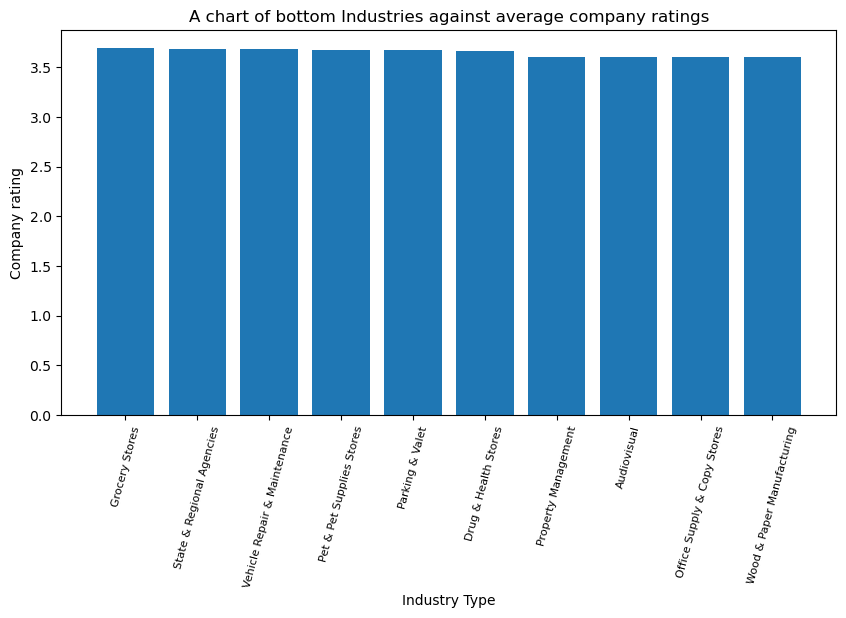

In [38]:
plt.figure(figsize=(10,5))
plt.bar(df12["Industry Type"], df12["Company rating"])
plt.title("A chart of bottom Industries against average company ratings")
plt.xlabel("Industry Type")
plt.ylabel('Company rating')
plt.xticks(rotation = 75, fontsize = 8)
plt.show()

### 5.13. correlation analysis between different columns using heatmap

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
df2_ = df

In [41]:
labelencoder = LabelEncoder()
lab1= labelencoder.fit_transform(df2_["Number of Employees"])
lab2= labelencoder.fit_transform(df2_["Industry Type"])

In [42]:
lab1

array([1, 1, 1, ..., 2, 4, 2])

In [43]:
df2_.drop("Number of Employees", axis = 1, inplace=True)
df2_.drop("Industry Type", axis = 1, inplace=True)
df2_

,Company Name,Company rating,Company reviews,Company salaries,Location,Company Description
0,Amazon,3.8,168800.0,201700.0,25 office locations in United States,"All Amazon teams and businesses, from Prime de..."
1,Deloitte,4.1,97200.0,167400.0,23 office locations in United States,Think a professional services career is nothin...
2,Target,3.6,75000.0,116100.0,4 office locations in United States,Target is one of the worlds most recognized b...
3,McDonald's,3.5,117000.0,71700.0,110 N Carpenter Street,McDonalds is proud to be one of the most reco...
4,Accenture,4.0,145100.0,53600.0,United States,Accenture is a global professional services co...
...,...,...,...,...,...,...
9935,Furman University,4.0,169000.0,229000.0,United States,"This school's slogan could be, ""Go Further tha..."
9936,Kilwin's Chocolates,3.8,186000.0,192000.0,United States,TOA Global is the market leader in dedicated o...
9937,TOA Global,4.3,618000.0,21000.0,United States,Insurance broking and risk management solution...
9938,JLT Group,3.7,543000.0,51000.0,United States,A steakhouse experience should be unforgettabl...


In [44]:
df2_["Number of Employees"] = lab1
df2_["Industry Type"] =lab2

In [45]:
df2_.head()

,Company Name,Company rating,Company reviews,Company salaries,Location,Company Description,Number of Employees,Industry Type
0,Amazon,3.8,168800.0,201700.0,25 office locations in United States,"All Amazon teams and businesses, from Prime de...",1,63
1,Deloitte,4.1,97200.0,167400.0,23 office locations in United States,Think a professional services career is nothin...,1,0
2,Target,3.6,75000.0,116100.0,4 office locations in United States,Target is one of the worlds most recognized b...,1,49
3,McDonald's,3.5,117000.0,71700.0,110 N Carpenter Street,McDonalds is proud to be one of the most reco...,1,95
4,Accenture,4.0,145100.0,53600.0,United States,Accenture is a global professional services co...,1,16


C:\Users\HP\AppData\Local\Temp\ipykernel_6444\873304772.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


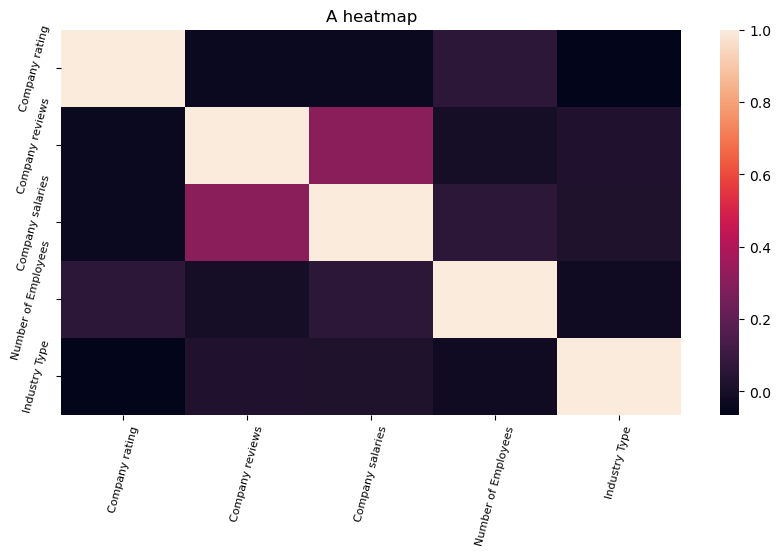

In [46]:

plt.figure(figsize=(10,5))
sns.heatmap(df.corr())
plt.title("A heatmap")
plt.xticks(rotation = 75, fontsize = 8)
plt.yticks(rotation = 75, fontsize = 8)
plt.show()

# SUMMARY

From the heatmap, we could see that there are little or no correlation between columns. 

we could deduce that the values from each columns are independent from each other.